<a href="https://colab.research.google.com/github/AjitVarpe/Data-Analysis-of-playstore/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [448]:
from google.colab import drive
drive.mount('/content/drive')
# mounting drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [449]:
#  Importing lib and module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [450]:
Data_Frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capston Project/EDA/Copy of Play Store Data.csv')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capston Project/EDA/Copy of User Reviews.csv')
#  Reading the both CSV file

In [451]:
Data_Frame.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [452]:
Data_Frame.head()
# Reading frist five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [453]:
type(Data_Frame)
# checking type

pandas.core.frame.DataFrame

In [454]:
Data_Frame.tail()
#  Checking the last 5 list

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [455]:
Data_Frame.shape
#  Cheking shape of data

(10841, 13)

In [456]:
Data_Frame.describe()
#  checking the information

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


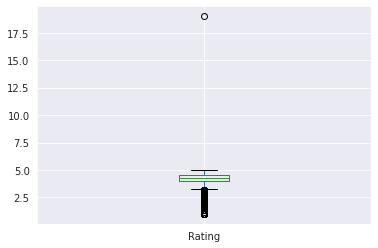

In [457]:
Data_Frame.boxplot()
# ploting the graph to check the where the values apper

In [458]:
Data_Frame[Data_Frame.Rating>5]
#  To check the data that containing values that are grater than the 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [459]:
Data_Frame.drop(Data_Frame.index[10472], inplace=True)
#  # Row 10472 removed due to having the wrong record of rating

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24ec236610>]],
      dtype=object)

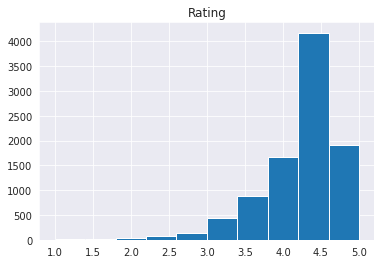

In [460]:
Data_Frame.hist()
#  checking the histrogam to check the where values are concentrated

## Removing columns that have 90% empty

In [461]:
# 10% rows of the column
length= len(Data_Frame)*0.1
print(length)
Data_Frame.dropna(thresh=length,axis=1,inplace=True)

1084.0


# Cheking the null values

In [462]:
#checking all the null values in the data
print(Data_Frame.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


### Data imputation and Manipulation 
filling the null values with appropriate values
i.e median, mode.



In [463]:
#  defined a function to impute median
def impute_median(series):
  return series.fillna(series.median())

In [464]:
#  Filling the NULL values of Rating column 
Data_Frame.Rating=Data_Frame['Rating'].transform(impute_median)
#  checking the null values after applying function
print(Data_Frame.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


In [465]:
#  Checking the mode of catgorical values.
print(Data_Frame['Type'].mode())
print(Data_Frame['Current Ver'].mode())
print(Data_Frame['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [466]:
#  Filling the catgorical values with mode
Data_Frame['Type'].fillna(str(Data_Frame['Type'].mode().values[0]),inplace=True)
Data_Frame['Current Ver'].fillna(str(Data_Frame['Current Ver'].mode().values[0]),inplace=True)
Data_Frame['Android Ver'].fillna(str(Data_Frame['Android Ver'].mode().values[0]),inplace=True)

In [467]:
# Checking the null values are being filled or not 
print(Data_Frame.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [468]:
Data_Frame.info()

#  To check the non-null data values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [469]:
#  Removing + sign from the installs columns
Data_Frame['Installs'] = Data_Frame['Installs'].map(lambda x: x.rstrip('+'))


In [470]:
Data_Frame['Installs'] = pd.to_numeric(Data_Frame['Installs'].str.replace(',',''))

In [471]:
Data_Frame['Price'] = pd.to_numeric(Data_Frame['Price'].str.replace('$',''))
#  Removing $ sign from the recoreds to easy perform numeric opration

In [472]:
Data_Frame['Reviews'] = pd.to_numeric(Data_Frame['Reviews'].str.replace('M',''))
#  converting the reviews of the column to number data type 

In [473]:
Data_Frame.head()
#  Cheking the records information

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [533]:
Data_Frame.describe()

,Rating,Reviews,Size,Installs,Price,log_installs
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000,9659.000000
mean,4.192463,2.168041e+05,17.805102,7.798170e+06,1.097231,4.642719
std,0.496055,1.831430e+06,21.496119,5.376973e+07,16.851618,1.910342
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2.500000e+01,2.900000,1.000000e+03,0.000000,3.000000
50%,4.300000,9.690000e+02,9.100000,1.000000e+05,0.000000,5.000000
75%,4.500000,2.945350e+04,25.000000,1.000000e+06,0.000000,6.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,9.000000


In [474]:
Data_Frame['Installs'].min(),Data_Frame['Installs'].max()

(0, 1000000000)

In [475]:
boolean = Data_Frame['App'].duplicated().any()
# checking the duplicate values in the record
boolean


True

In [476]:
Data_Frame['App'].value_counts()
# counting the duplicated values

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
                                                    ..
Mindvalley U Tallinn 2018                            1
Differential Dx Free                                 1
NCLEX-RN Q&A FLASH CARDS - FA Davis                  1
BL Portfolio                                         1
Offline Jízdní řády CG Transit                       1
Name: App, Length: 9659, dtype: int64

In [477]:
Data_Frame[Data_Frame['App']=='ROBLOX']
#  checking the data is credential or not

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [478]:
Data_Frame.drop_duplicates(inplace=True)
#  droping the duplicated values from the record

In [479]:
Data_Frame = Data_Frame.loc[Data_Frame.groupby(['App'])['Reviews'].idxmax()]

**Setting the parameter for plot graph**

In [480]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [481]:
# checking the top 20 apps of the list
top_genres = Data_Frame.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [482]:
genres_installs = Data_Frame.groupby(['Genres'])[['Installs']].sum()

In [483]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


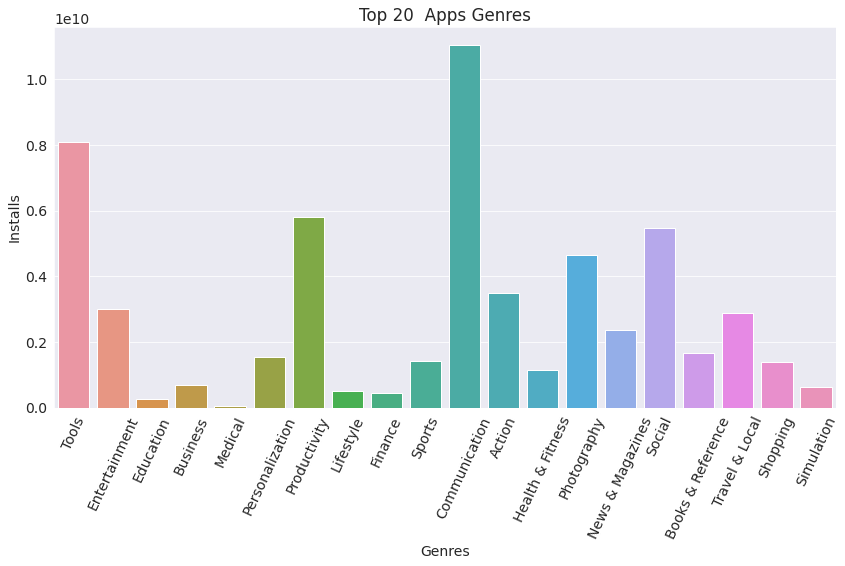

In [484]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20  Apps Genres")
sns.barplot(top_20_genres_installs.Genres,  top_20_genres_installs.Installs)
plt.show()

In [485]:
top_20_genres_installs.Installs

0      8092771915
1      3014714684
2       262910148
3       697164865
4        38293077
5      1532494782
6      5793091369
7       493823539
8       455348734
9      1412474498
10    11038276251
11     3483039190
12     1144022512
13     4658147655
14     2369217760
15     5487867902
16     1665969576
17     2894787146
18     1400348785
19      629597820
Name: Installs, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


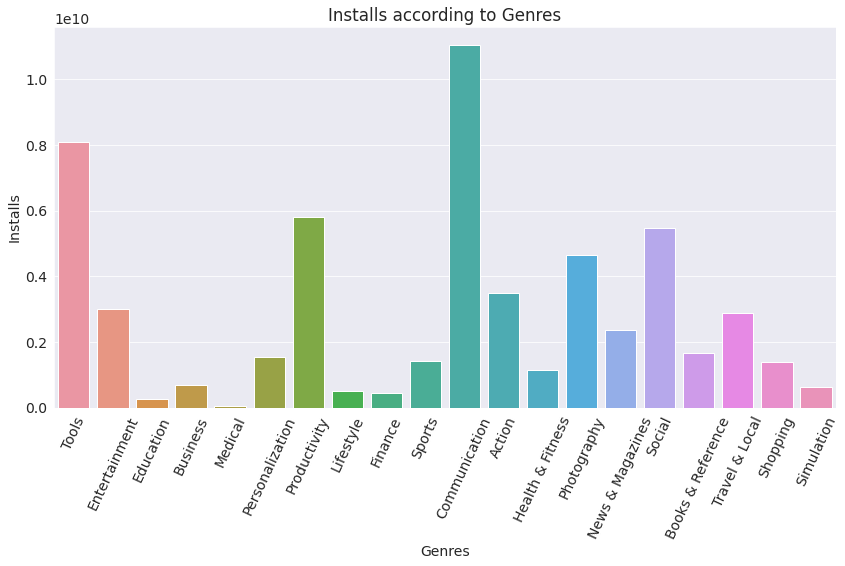

In [486]:
#  Genres that are getting installed the most in top 20 Genres
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres,top_20_genres_installs.Installs)
plt.show()

In [487]:
top_category = Data_Frame.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [488]:
category_installs = Data_Frame.groupby(['Category'])[['Installs']].sum()

In [489]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


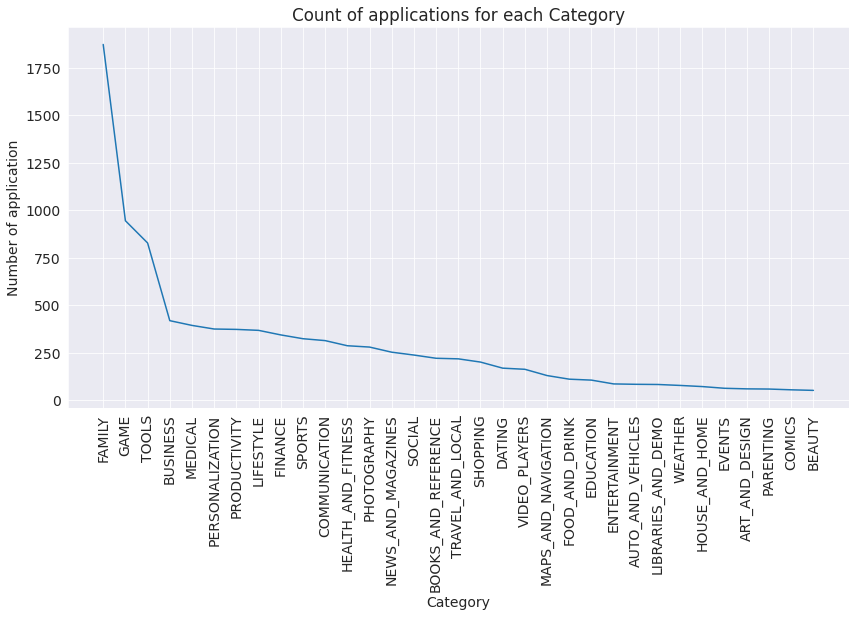

In [490]:
#  plotting the line graph to check the where values are exist and value per category / Data flow  
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.lineplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


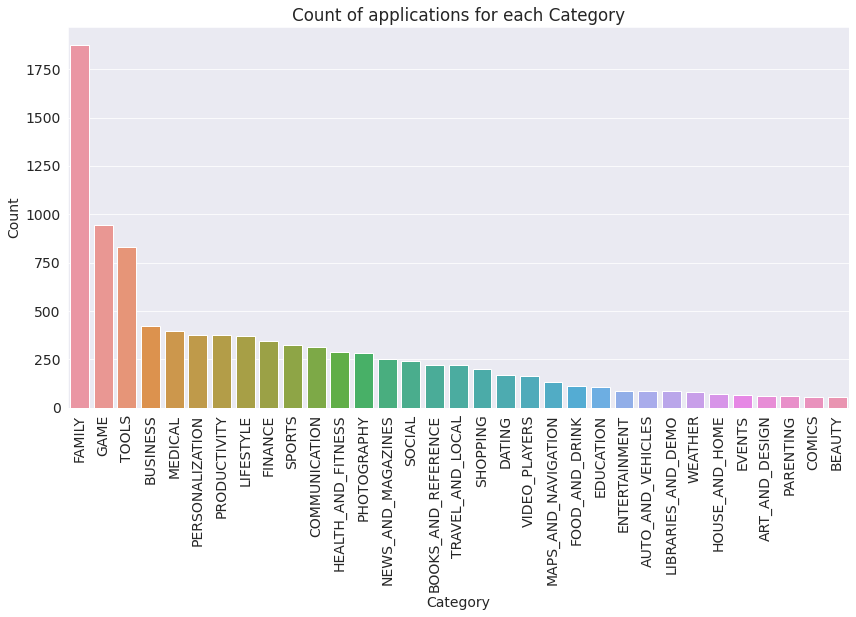

In [491]:
#  PLOTTING THE BARPLOT TO CHECK THE POINT
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


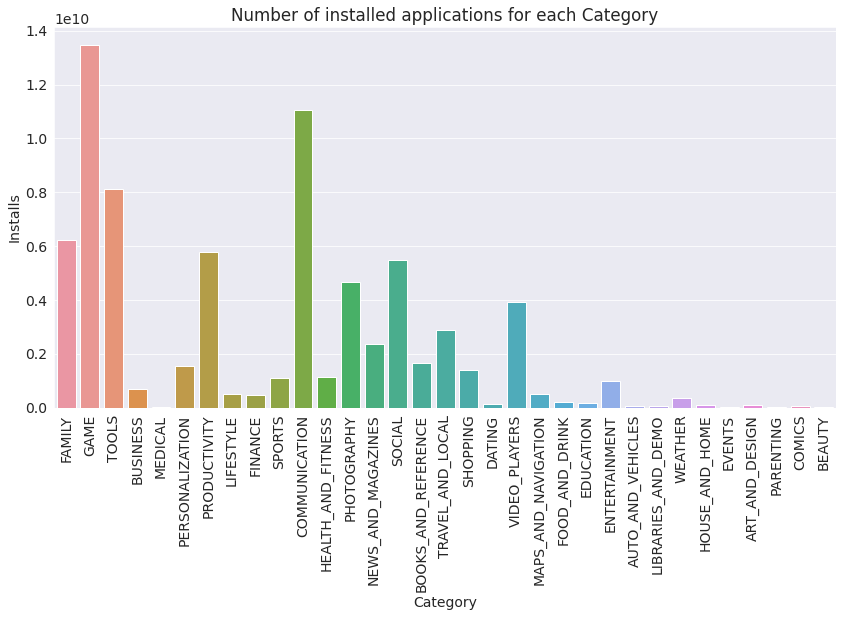

In [492]:
#  Number of installed application for each category.
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

**As we can see from the above two plots: Maxinum number of apps present in google play store comes under Family, Games and Tools Category but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Games, Communication and Tools.**

In [493]:
genres_ratings_df = Data_Frame.groupby(['Genres'])[['Rating']].mean()

In [494]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [495]:
genres_installs_ratings['Rating'].describe()

count    118.000000
mean       4.258494
std        0.169659
min        3.800000
25%        4.155364
50%        4.260948
75%        4.341071
max        4.800000
Name: Rating, dtype: float64

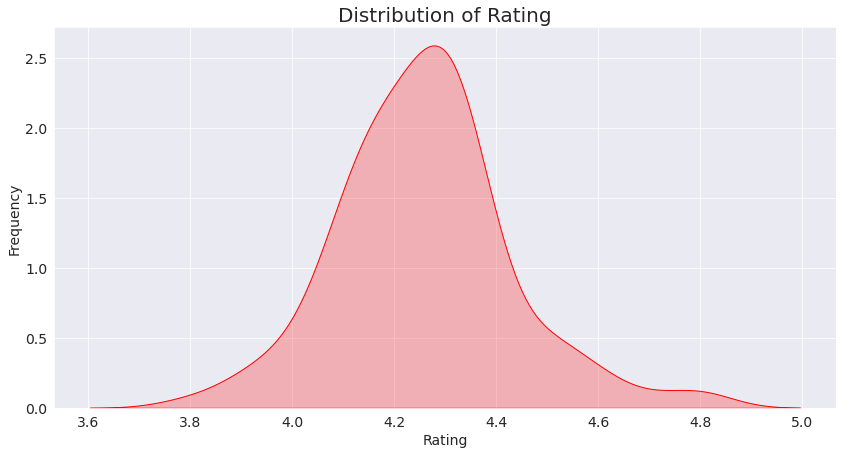

In [496]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

**Highest and lowest rated Genres**

In [497]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [498]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


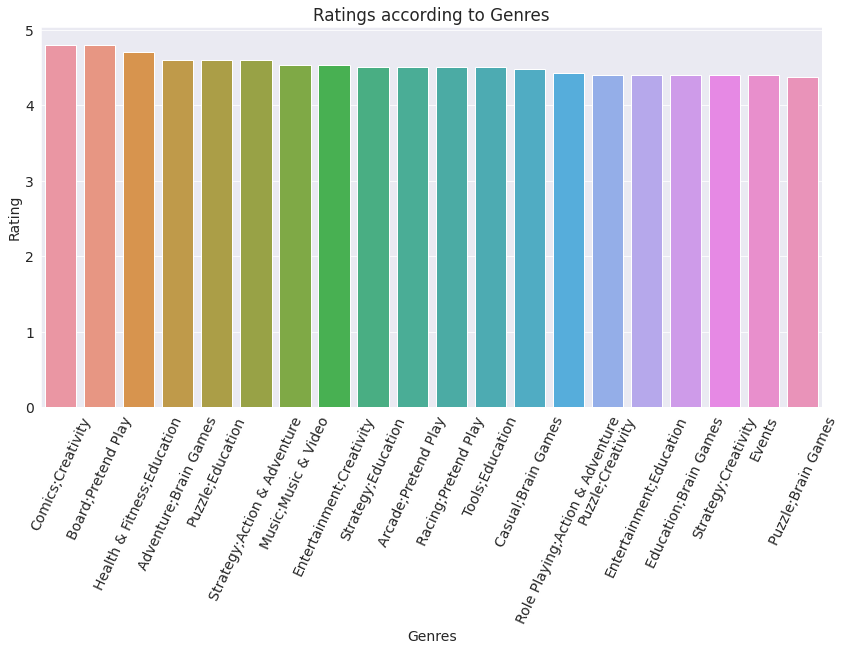

In [499]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

**Rating according to the genres
**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


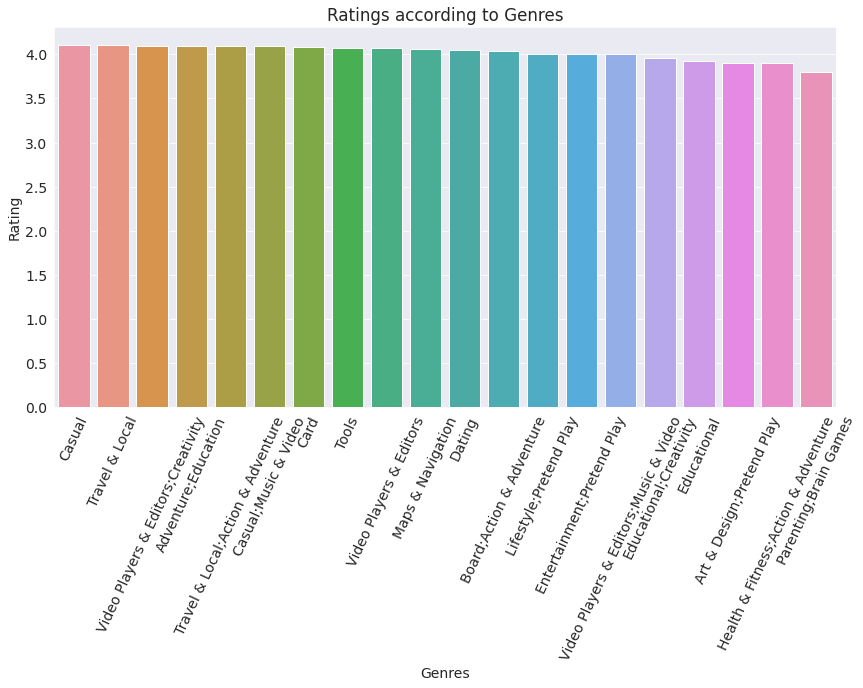

In [500]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

**What are the count of applications in each category differentiated by their type?**

In [501]:
app_count = Data_Frame.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [502]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

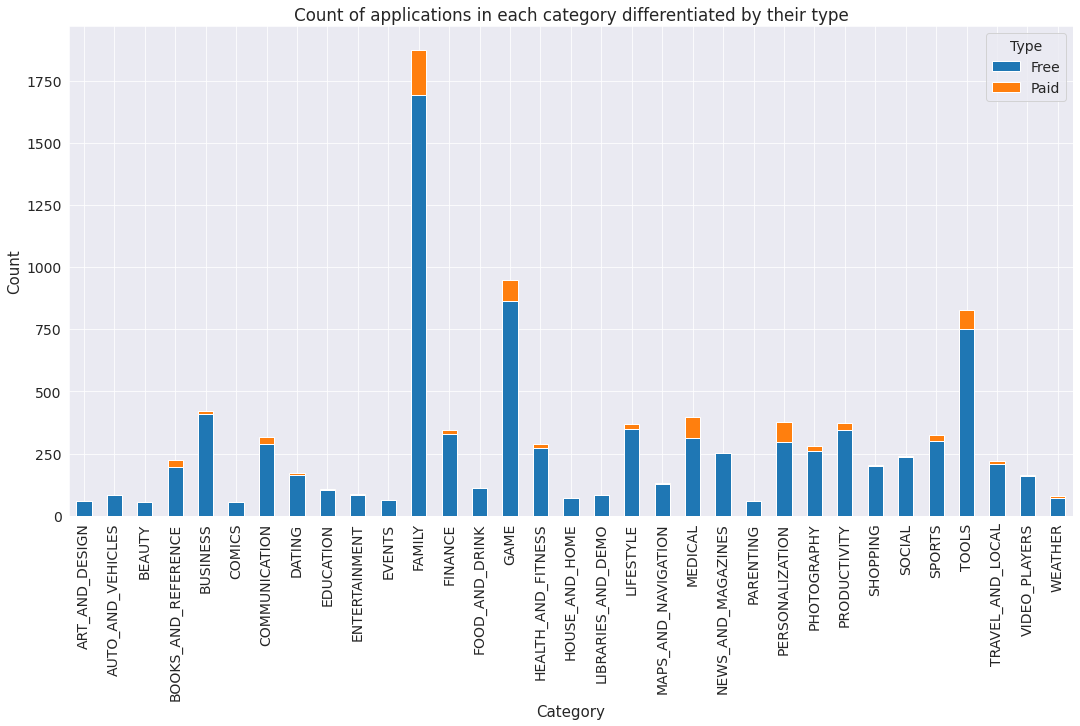

In [503]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.


**How many apps were installed according to its type?
**

In [504]:
Data_Frame['Gaming Category App'] = Data_Frame['Category']=='GAME'

In [505]:
categoty_type_installs = Data_Frame.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [506]:
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


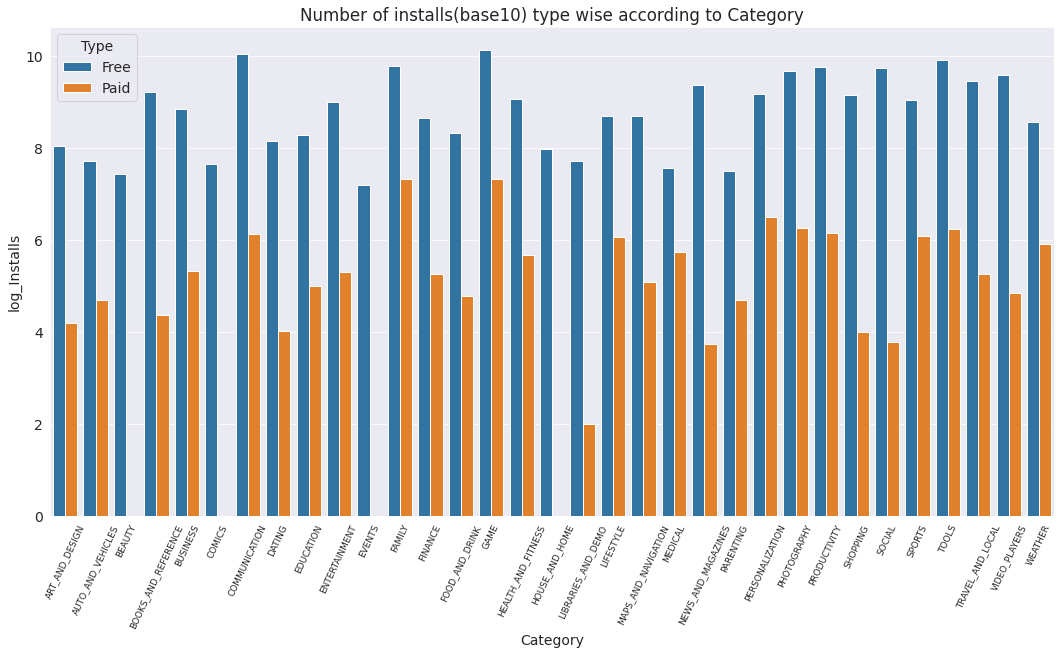

In [507]:
# Number of installs(base10) type wise according to Category
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("Number of installs(base10) type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

It can be concludd that the number of free applications installed by the user are high when compared with the paid ones.
Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.


In [508]:
# Converting KB to MB 
Data_Frame['Size'] = Data_Frame['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
Data_Frame['Size'] = Data_Frame['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
Data_Frame['Size'] = Data_Frame['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
Data_Frame['Size'] = Data_Frame['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
Data_Frame['Size'] = Data_Frame['Size'].apply(lambda x: float(x))

In [509]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [510]:
Data_Frame.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Gaming Category App'],
      dtype='object')

How does size impact on the number of installs of any application?

As we can notice,there is a high variance in the number of installs. To remove this we are adding a new column to dataframe, which is the log of number of installs

In [511]:
Data_Frame['log_installs'] = np.log10(Data_Frame['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


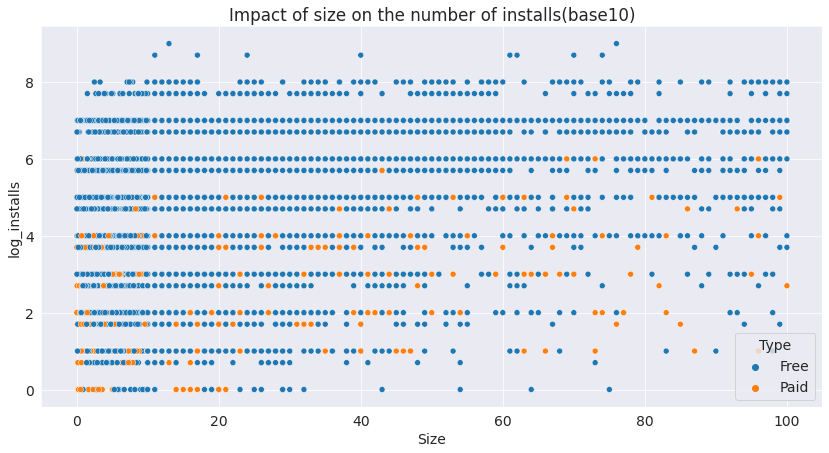

In [512]:
plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs(base10)")
sns.scatterplot(Data_Frame['Size'], Data_Frame['log_installs'], hue=Data_Frame['Type'])
plt.show()

Histogram of log installs


In [513]:
Data_Frame.loc[Data_Frame['log_installs']==Data_Frame['log_installs'].min(),'log_installs']=0

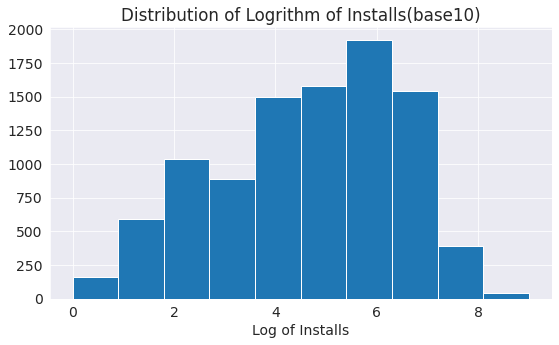

In [514]:
plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs(base10)")
plt.hist(Data_Frame['log_installs']);

Histogram of size


In [515]:
Data_Frame.isnull().sum()
#  to get the sum of the not null values 

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                   1228
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Gaming Category App       0
log_installs              0
dtype: int64

In [516]:
# to remove null values from size column
Data_Frame.loc[Data_Frame['Size'].isnull(),'Size']=0

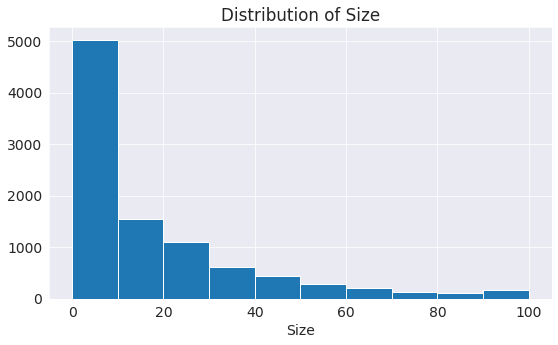

In [517]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(Data_Frame['Size']);
plt.show()

From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

## **Merging both Data set and forming a new data frame**

In [518]:
merged_df = Data_Frame.merge(df, on="App")

 n the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

# distribution type of reviews in the dataset

In [519]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


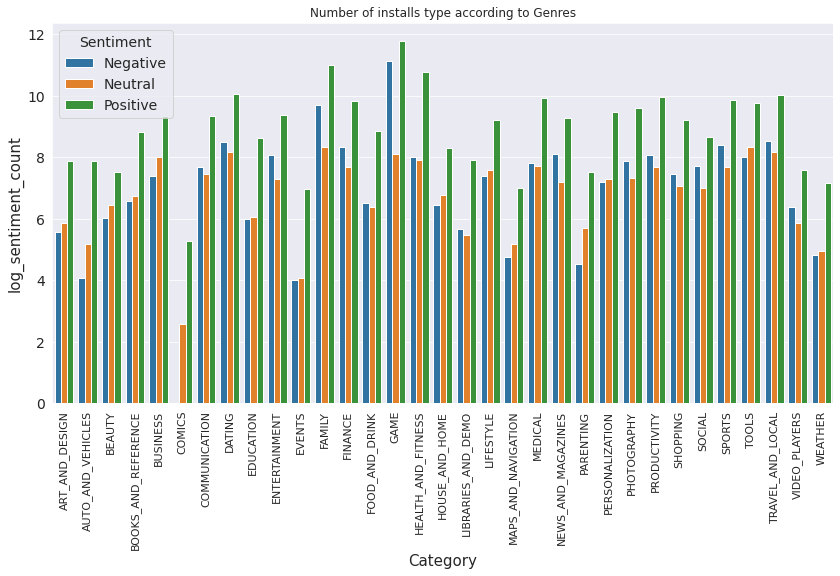

In [520]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type according to Genres",fontsize=12)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

# Histogram of subjectivity


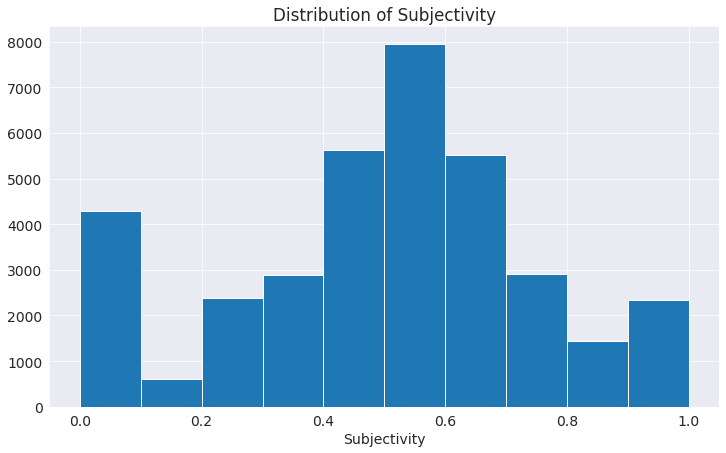

In [521]:
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that macimum number of users give reviews to the applications, according to their experience.



### is sentiment_subjectivity proportional to sentiment_polarity

In [522]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


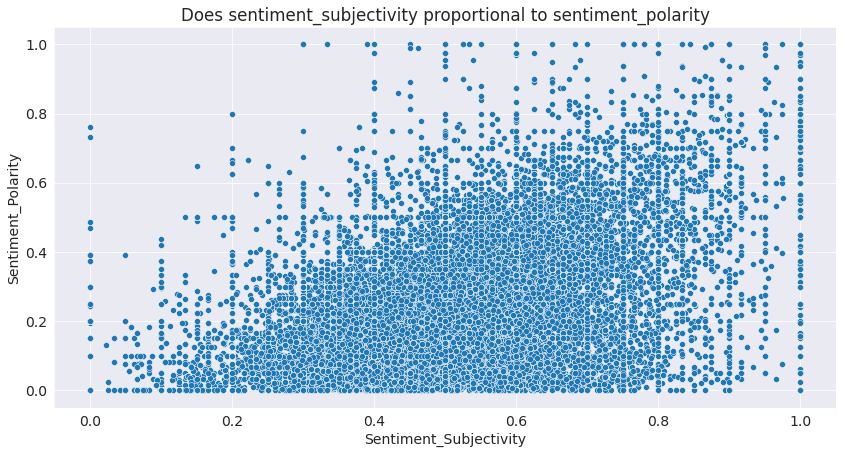

In [523]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low


## Sentiment review in percentage 

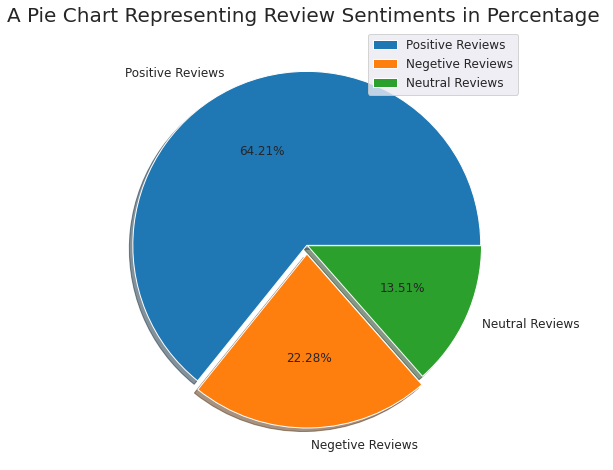

In [524]:

counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Review Sentiments in Percentage ', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

In [525]:
Data_Frame.isnull().sum()
#  to get the sum of the not null values 

App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Android Ver            0
Gaming Category App    0
log_installs           0
dtype: int64

In [526]:
df.head()
#  Checking the frist five data of the csv file

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [527]:
df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [529]:
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [530]:
df.shape

(64295, 5)

In [531]:

df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


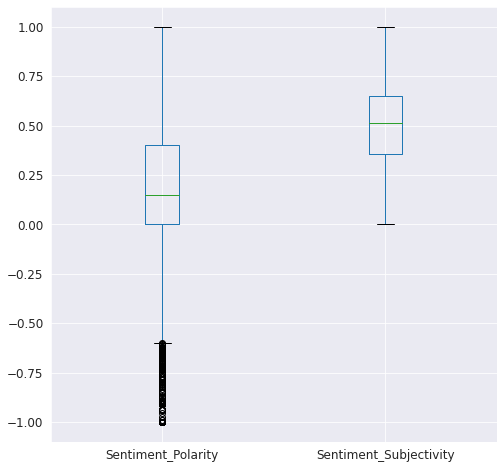

In [532]:
df.boxplot()